In [121]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree  #to visualize tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression

 # Load the dataset and perform necessary preprocessing steps.

In [123]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [124]:
# Find missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [125]:
# Rows and columns distribution
df.shape

(205, 26)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [127]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

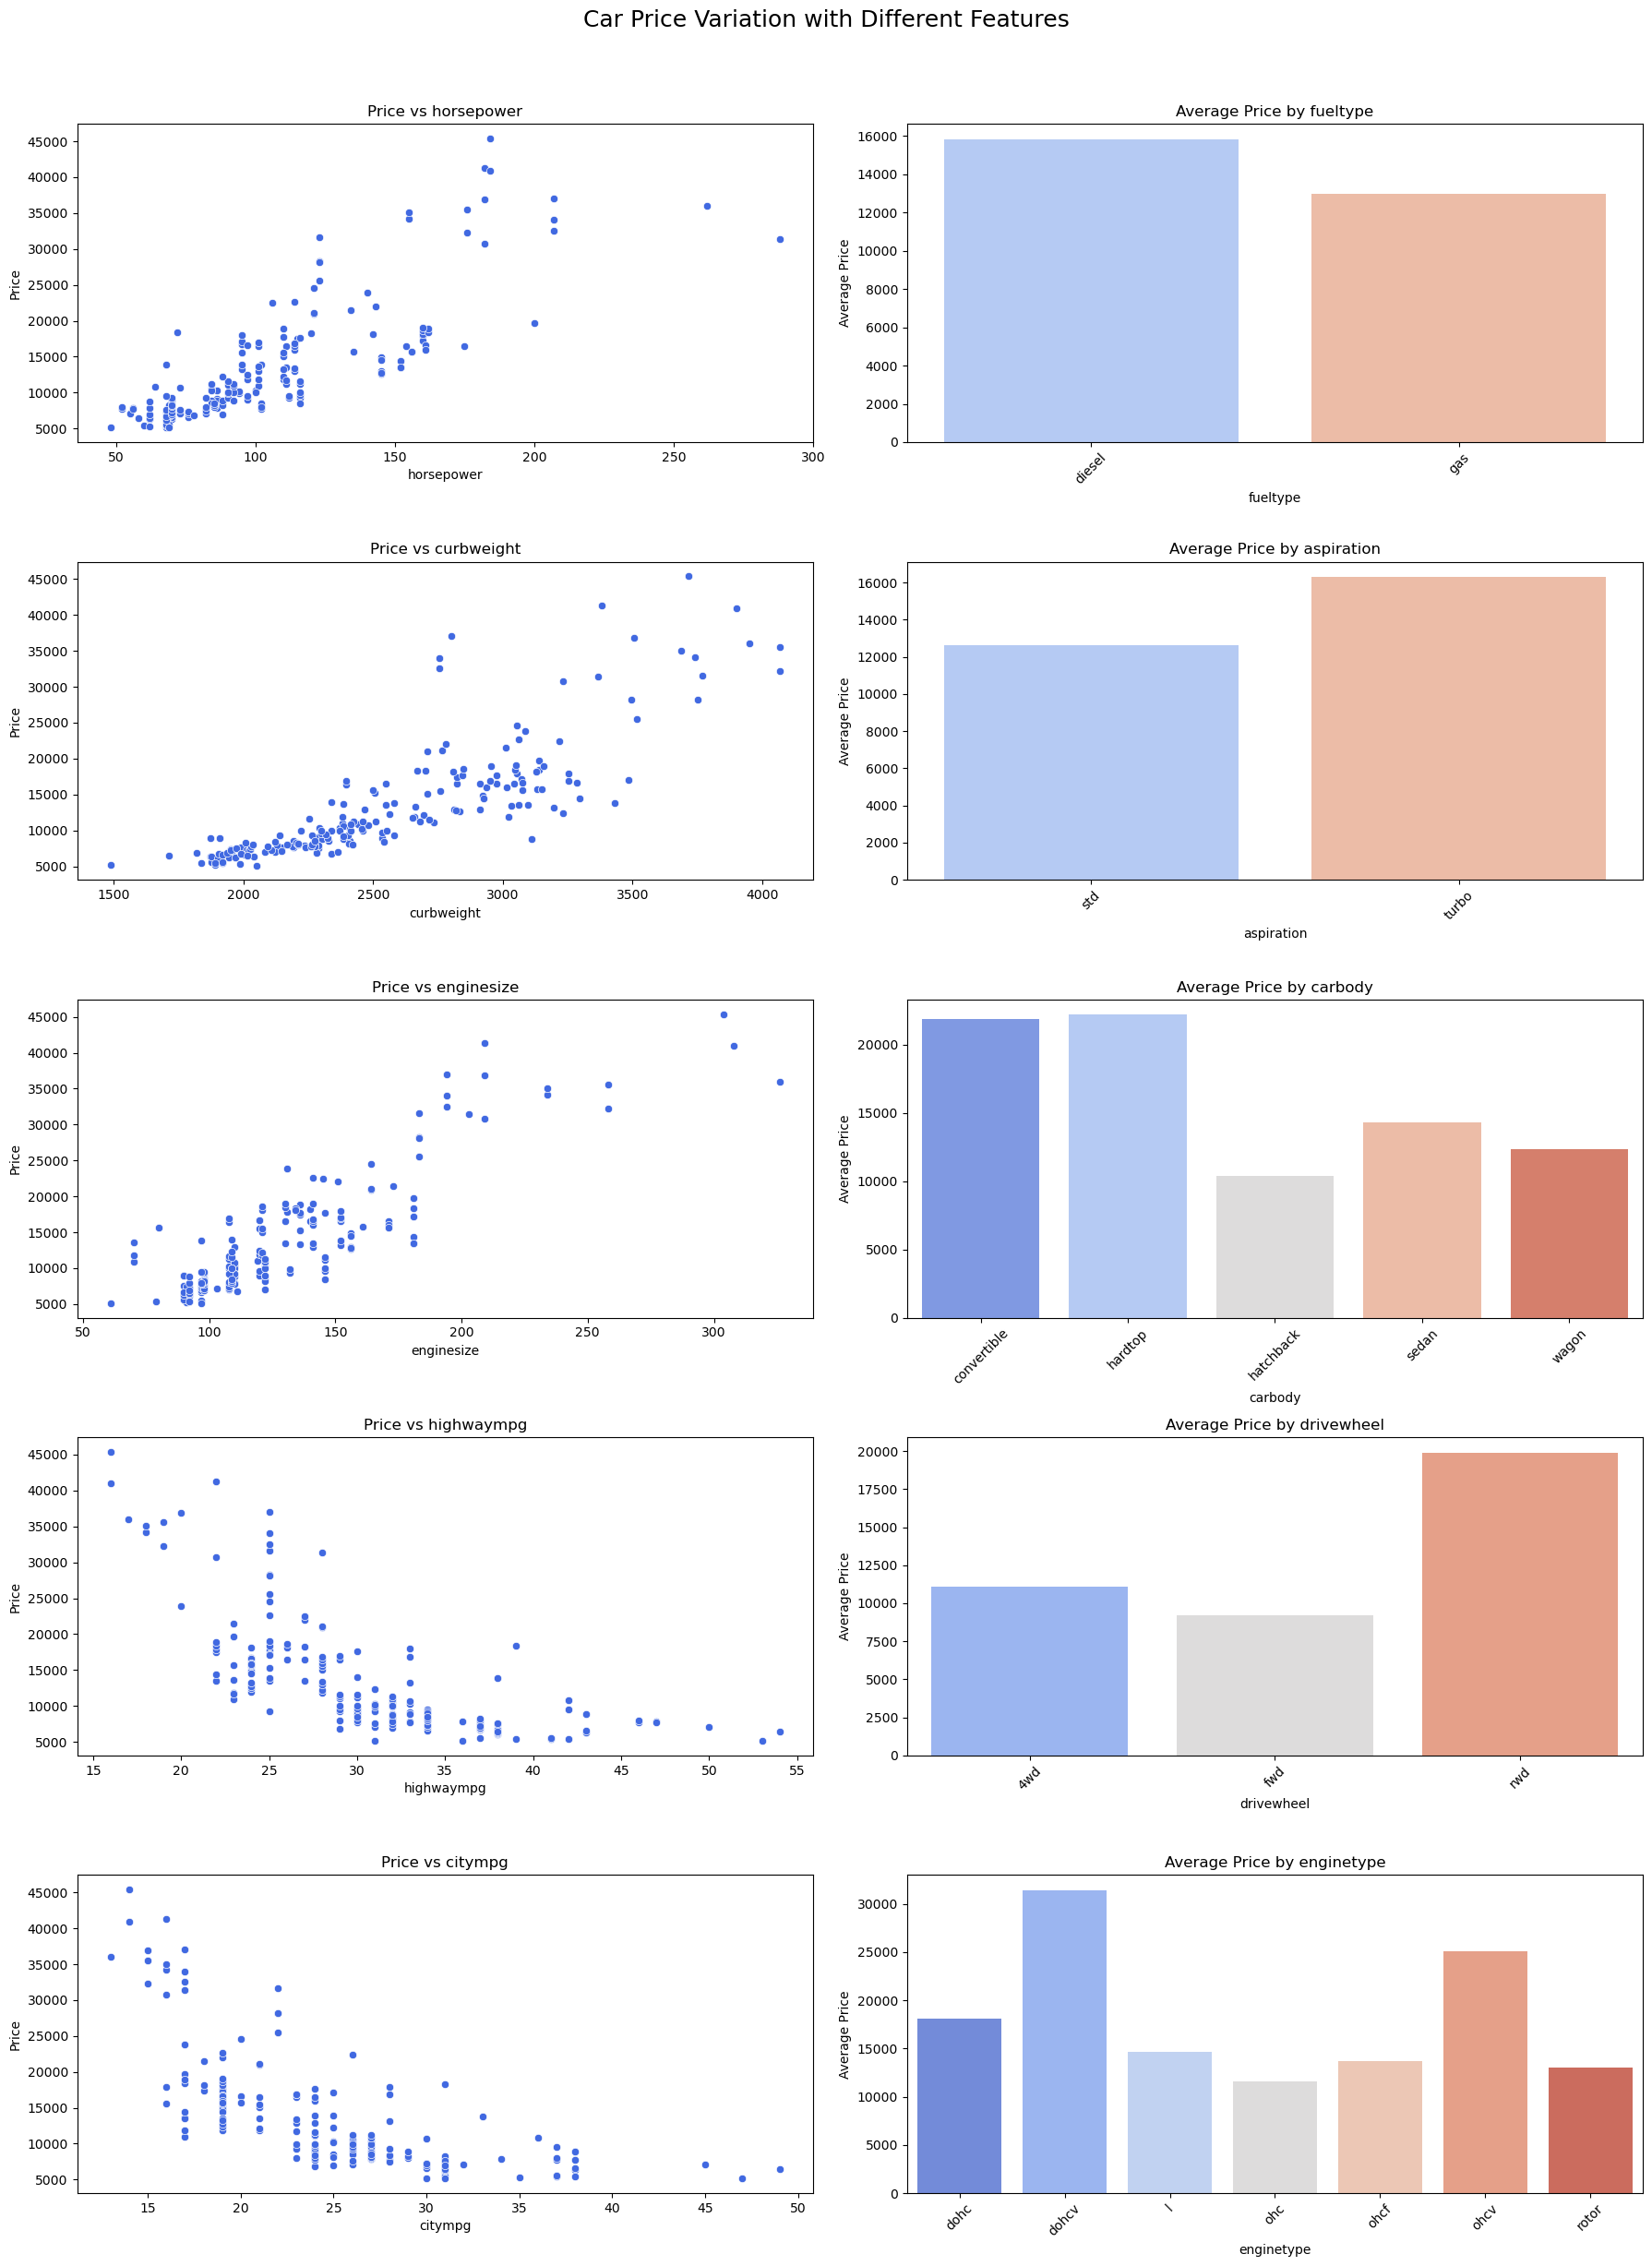

In [128]:
# Define numerical and categorical features
numerical_features = ['horsepower', 'curbweight', 'enginesize', 'highwaympg', 'citympg']
categorical_features = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype']

# Create subplots (5 rows, 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(18, 25))
fig.suptitle("Car Price Variation with Different Features", fontsize=18)

# Scatter plots for numerical features
for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=df[feature], y=df['price'], ax=axes[i, 0], color="royalblue")
    axes[i, 0].set_title(f"Price vs {feature}")
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel("Price")

# Bar charts for categorical features (showing mean price per category)
for i, feature in enumerate(categorical_features):
    avg_price = df.groupby(feature)['price'].mean().reset_index()  # Calculate mean price per category
    sns.barplot(x=feature, y='price', data=avg_price, ax=axes[i, 1], palette="coolwarm")
    axes[i, 1].set_title(f"Average Price by {feature}")
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel("Average Price")
    axes[i, 1].tick_params(axis='x', rotation=45)  # Rotate labels for readability

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [129]:
df.drop(columns=['car_ID'], inplace=True)

* Encode categorical variables using Label Encoding

In [131]:
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [132]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [133]:
# Separate features and target variable
X = df.drop(columns=['price'])
y = df['price']

* Standardize numerical features

In [135]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

* Apply SelectKBest with f_regression

In [137]:
select_k = SelectKBest(score_func=f_regression, k=10)  # Selecting top 10 features
X_selected = select_k.fit_transform(X_scaled, y)

# Get selected feature names and scores
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()]

In [138]:
# Store results in a DataFrame
feature_importance = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})
feature_importance = feature_importance.sort_values(by='Score', ascending=False)
# Print the significant features
print("Top 10 Significant Features Affecting Car Price:")
print(feature_importance)


Top 10 Significant Features Affecting Car Price:
      Feature       Score
5  enginesize  657.640421
4  curbweight  468.594431
7  horsepower  382.163409
3    carwidth  276.423646
9  highwaympg  192.437464
8     citympg  180.203163
2   carlength  177.420344
0  drivewheel  101.838772
1   wheelbase  101.745716
6   boreratio   89.507470


In [139]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Implement the following five regression algorithms:
1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) Gradient Boosting Regressor
5) Support Vector Regressor

In [141]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='linear')
}

In [142]:
# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({"Model": name, "R2 Score": r2, "MSE": mse, "MAE": mae})

# Convert results to DataFrame and sort by R2 Score
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)

In [143]:
# Print model performance
print("Model Performance Comparison:")
print(results_df)

# Identify the best performing model
best_model = results_df.iloc[0]
print("\nBest Performing Model:")
print(best_model)

Model Performance Comparison:
                         Model  R2 Score           MSE          MAE
2      Random Forest Regressor  0.955830  3.486988e+06  1288.232638
3  Gradient Boosting Regressor  0.914774  6.728108e+06  1683.609090
1      Decision Tree Regressor  0.899393  7.942288e+06  1862.550805
0            Linear Regression  0.827301  1.363354e+07  2616.658665
4     Support Vector Regressor  0.080681  7.257470e+07  4971.508669

Best Performing Model:
Model       Random Forest Regressor
R2 Score                    0.95583
MSE                  3486988.257314
MAE                     1288.232638
Name: 2, dtype: object


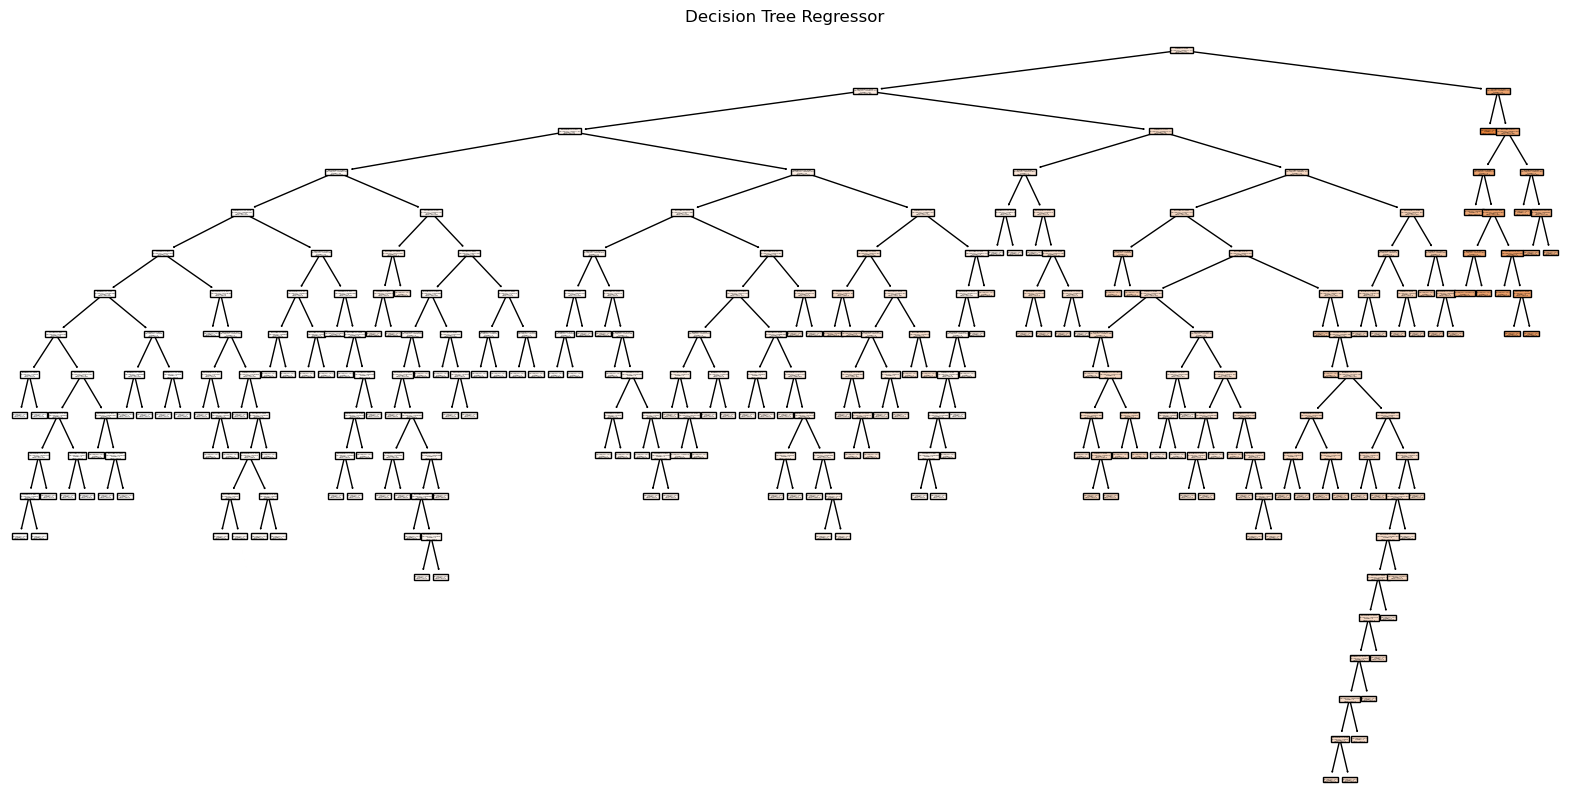

In [144]:
# Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, filled=True, feature_names=df.drop(columns=['price']).columns)
plt.title("Decision Tree Regressor")
plt.show()

# Perform hyperparameter tuning and check whether the performance of the model has increased.


In [146]:
models2 = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}
params = {
    "Decision Tree": {"max_depth": [3, 5, None]},
    "Random Forest": {"n_estimators": [50, 100]},
    "Gradient Boosting": {"n_estimators": [50, 100]},
    "SVR": {"C": [0.1, 1], "kernel": ["linear"]}
}

In [147]:
# Evaluate models
results = []
for name, model in models2.items():
    grid = GridSearchCV(model, params[name], cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.best_estimator_.predict(X_test)
    results.append({"Model": name, "R2 Score": r2_score(y_test, y_pred)})

# Display results
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)

               Model  R2 Score
1      Random Forest  0.959707
2  Gradient Boosting  0.921490
0      Decision Tree  0.885888
3                SVR  0.080681


* Random Forest performed best in both cases, improving slightly after tuning.
* Gradient Boosting also improved and remains the second-best model.
* Decision Tree regressor saw a slight drop, possibly due to overfitting.
* SVR remained ineffective, suggesting it is not well-suited for this problem.